In [1]:
import pprint as pp
import requests 
import eventregistry
import feedparser as fp
import json
from newsapi import NewsApiClient
from datetime import date
import datetime
import pandas as pd
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime, timedelta
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize.regexp import WhitespaceTokenizer
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob


[nltk_data] Downloading package punkt to /Users/hsaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hsaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
newsapi = NewsApiClient(api_key='f513e29c94b844758f79311e9e081927')

all_articles = newsapi.get_everything(q='Coronavirus',
                                      sources= 'breitbart-news',
                                      from_param='2020-03-11',
                                      to= '2020-04-09',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100,
                                      page=1)




In [3]:
def get_sources(country):
    sources = newsapi.get_sources(country=country)
    sources = [x['id'] for x in sources['sources']]
    return sources

sources= get_sources(country='us')
print(sources[:200])


['abc-news', 'al-jazeera-english', 'ars-technica', 'associated-press', 'axios', 'bleacher-report', 'bloomberg', 'breitbart-news', 'business-insider', 'buzzfeed', 'cbs-news', 'cnbc', 'cnn', 'cnn-es', 'crypto-coins-news', 'engadget', 'entertainment-weekly', 'espn', 'espn-cric-info', 'fortune', 'fox-news', 'fox-sports', 'google-news', 'hacker-news', 'ign', 'mashable', 'medical-news-today', 'msnbc', 'mtv-news', 'national-geographic', 'national-review', 'nbc-news', 'new-scientist', 'newsweek', 'new-york-magazine', 'next-big-future', 'nfl-news', 'nhl-news', 'politico', 'polygon', 'recode', 'reddit-r-all', 'reuters', 'techcrunch', 'techradar', 'the-american-conservative', 'the-hill', 'the-huffington-post', 'the-next-web', 'the-verge', 'the-wall-street-journal', 'the-washington-post', 'the-washington-times', 'time', 'usa-today', 'vice-news', 'wired']


In [4]:
print(all_articles)

{'status': 'ok', 'totalResults': 2817, 'articles': [{'source': {'id': 'breitbart-news', 'name': 'Breitbart News'}, 'author': 'Simon Kent', 'title': 'Shoot Stray Dogs, Win Cash Prizes: How Chinese Officials Slaughtered Canines...', 'description': 'Shoot Stray Dogs, Win Cash Prizes: How Chinese Officials Slaughtered Canines... (Third column, 4th story, link ) Related stories: Chinese Tycoon Who Criticized Xi Response to Coronavirus Has Vanished...', 'url': 'https://www.breitbart.com/asia/2020/03/16/shoot-stray-dogs-win-cash-prizes-how-chinese-officials-slaughtered-canines/', 'urlToImage': 'https://media.breitbart.com/media/2020/03/dog-pet-640x335.jpg', 'publishedAt': '2020-03-16T14:49:40Z', 'content': 'A southern China community neighbourhood management office offered cash rewards to citizens for slaughtering stray or “unleashed” dogs during the coronavirus epidemic, according to an online news report.\r\nThe gruesome incentive was included in a notice issued… [+2486 chars]'}, {'source':

In [5]:
data= pd.DataFrame(all_articles['articles'])
data

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Simon Kent,"Shoot Stray Dogs, Win Cash Prizes: How Chinese...","Shoot Stray Dogs, Win Cash Prizes: How Chinese...",https://www.breitbart.com/asia/2020/03/16/shoo...,https://media.breitbart.com/media/2020/03/dog-...,2020-03-16T14:49:40Z,A southern China community neighbourhood manag...
1,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Frances Martel,Report: Wuhan Funeral Homes Burn Victims Alive...,Report: Wuhan Funeral Homes Burn Victims Alive...,https://www.breitbart.com/asia/2020/04/07/repo...,https://media.breitbart.com/media/2020/04/AP_2...,2020-04-07T16:49:37Z,"Locals in Wuhan, where the Chinese coronavirus..."
2,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Bob Price,80% of residents in TX nursing home infected...,80% of residents in TX nursing home infected.....,https://www.breitbart.com/border/2020/04/02/co...,https://media.breitbart.com/media/2020/04/AP_2...,2020-04-03T16:55:37Z,"San Antonio, Texas, officials report that 66 o..."
3,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Gabrielle Reyes,Beijing Boasts of 'Roaring' Economy...,Beijing Boasts of 'Roaring' Economy... (Second...,https://www.breitbart.com/asia/2020/03/31/chin...,https://media.breitbart.com/media/2020/03/Gett...,2020-04-01T01:55:38Z,"In Sihanoukville, a Chinese-funded gambling en..."
4,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Breitbart News,How to Get Small Business Coronavirus Loans - ...,How to Get Small Business Coronavirus Loans Br...,https://www.breitbart.com/news/how-to-get-smal...,https://media.breitbart.com/media/2020/01/Stev...,2020-04-02T22:19:00Z,NEW YORK (AP) Millions of small business owner...
5,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...","Charlie Spiering, Charlie Spiering",White House Coronavirus Task Force Details Dat...,Coronavirus Response Coordinator Dr. Deborah B...,https://www.breitbart.com/politics/2020/03/31/...,https://media.breitbart.com/media/2020/03/wi/a...,2020-03-31T23:13:41Z,White House Coronavirus Response Coordinator D...
6,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...","Sean Moran, Sean Moran",Watch Live: House Debates $2 Trillion Coronavi...,The House will consider the Senate-passed coro...,https://www.breitbart.com/politics/2020/03/27/...,https://media.breitbart.com/media/2018/08/Floo...,2020-03-27T13:27:36Z,The House will consider the Senate-passed coro...
7,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...","Sean Moran, Sean Moran",Watch Live: Senate Debates Coronavirus Relief ...,The Senate will continue to debate the biparti...,https://www.breitbart.com/politics/2020/03/23/...,https://media.breitbart.com/media/2020/03/AP_2...,2020-03-23T17:05:21Z,The Senate will continue to debate the biparti...
8,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",Hannah Bleau,BERNIE: Wisconsin Election 'May Very Well Prov...,BERNIE: Wisconsin Election 'May Very Well Prov...,https://www.breitbart.com/politics/2020/04/07/...,https://media.breitbart.com/media/2020/02/Gett...,2020-04-07T16:49:39Z,Sen. Bernie Sanders (I-VT) on Tuesday expresse...
9,"{'id': 'breitbart-news', 'name': 'Breitbart Ne...",John Carney,CRAMER: SUSPEND TAX COLLECTION...,CRAMER: SUSPEND TAX COLLECTION... (Top headlin...,https://www.breitbart.com/economy/2020/03/12/j...,https://media.breitbart.com/media/2018/02/Jim-...,2020-03-12T14:52:36Z,Jim Cramer has a radical plan to fight the eco...


In [6]:
data_list=  all_articles['articles']
key_words_100=[]
for data in all_articles['articles']:
    art = Article(url=data['url'])
    art.download()
    art.parse()
    art.nlp()
    key_words_100.append(art.keywords)


In [8]:
urls=[]
for data in all_articles['articles']:
    url=data['url']
    urls.append(url)


In [21]:
pol_score = []
sub_score=[]

for i in range(len(urls)):

    art = Article(url=urls[i])
    art.download()
    art.parse()
    pol_score.append(TextBlob(art.text).sentiment.polarity)
    sub_score.append(TextBlob(art.text).sentiment.subjectivity)
    
    
    
    
    
df = pd.DataFrame(list(zip(pol_score,sub_score)), columns = ['polarity', 'subjectivity'])     
    
    
    
    


In [22]:
df

,polarity,subjectivity
0,0.032006,0.383268
1,0.073194,0.331688
2,0.052241,0.431183
3,0.062834,0.307491
4,0.095446,0.437831
5,-0.001985,0.425758
6,0.186364,0.345455
7,0.233333,0.400000
8,0.051903,0.522672
9,0.116146,0.506487


(array([ 2.,  1.,  1.,  7.,  5., 11., 12.,  3.,  4.,  4.]),
 array([0.17588933, 0.21384015, 0.25179097, 0.28974179, 0.3276926 ,
        0.36564342, 0.40359424, 0.44154506, 0.47949588, 0.5174467 ,
        0.55539752]),
 <a list of 10 Patch objects>)

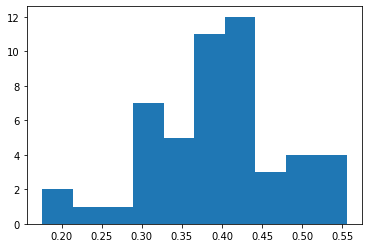

In [25]:
plt.hist(df['subjectivity'])

(array([ 1.,  1.,  1.,  5.,  9., 12., 13.,  2.,  4.,  2.]),
 array([-0.2       , -0.15270382, -0.10540765, -0.05811147, -0.0108153 ,
         0.03648088,  0.08377706,  0.13107323,  0.17836941,  0.22566558,
         0.27296176]),
 <a list of 10 Patch objects>)

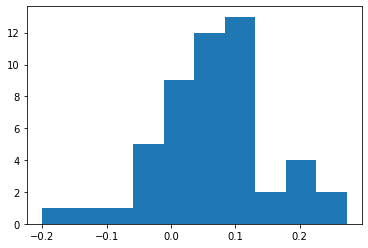

In [26]:
plt.hist(df['polarity'])

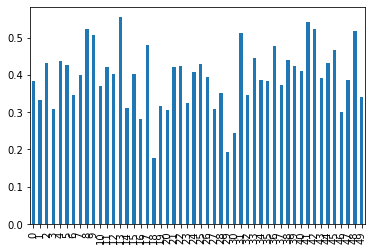

In [32]:
df['subjectivity'].plot.bar()

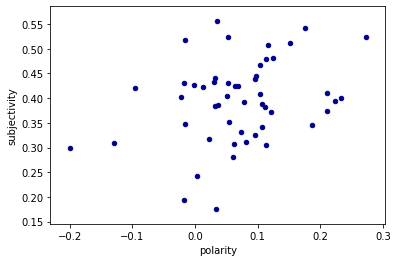

In [35]:
df.plot.scatter(x='polarity',
...             y='subjectivity',
...             c='DarkBlue')

In [36]:
key_words_100

[['stated',
  'officials',
  'slaughter',
  'animals',
  'notice',
  'wanted',
  'chinese',
  'coronavirus',
  'prizes',
  'win',
  'canines',
  'shoot',
  'wanjiang',
  'stray',
  'dogs',
  'cash',
  'community',
  'pets'],
 ['patients',
  'body',
  'burned',
  'chinese',
  'funeral',
  'coronavirus',
  'homes',
  'report',
  'wuhan',
  'victims',
  'alive',
  'woman',
  'remains',
  'video'],
 ['officials',
  'san',
  'residents',
  'virus',
  'strikes',
  '84',
  'nursing',
  '66',
  'coronavirus',
  'reported',
  'antonio',
  'texas',
  'tested',
  'covid19'],
 ['casinos',
  'recently',
  'bri',
  'sihanoukvilles',
  'sihanoukville',
  'chinese',
  'coronavirus',
  'china',
  'cambodian',
  'casino',
  'recent',
  'gold',
  'urinals',
  'port',
  'installing'],
 ['sba',
  'program',
  'loans',
  'protection',
  'loan',
  'help',
  'business',
  'coronavirus',
  'small',
  'money',
  'owners'],
 ['days',
  'united',
  'virus',
  '100000240000',
  'task',
  'predicting',
  'force',
 

In [37]:
key_words_100
flat_list = [item for sublist in key_words_100 for item in sublist]

In [38]:
STOPWORDS.add('coronavirus ')
STOPWORDS.add(' coronavirus')
STOPWORDS.add('corona')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus ')
STOPWORDS.add(' coronavirus ')
STOPWORDS.add('Corona')
STOPWORDS.add('covid19')
STOPWORDS.add('COVID19')
STOPWORDS.add('virus')


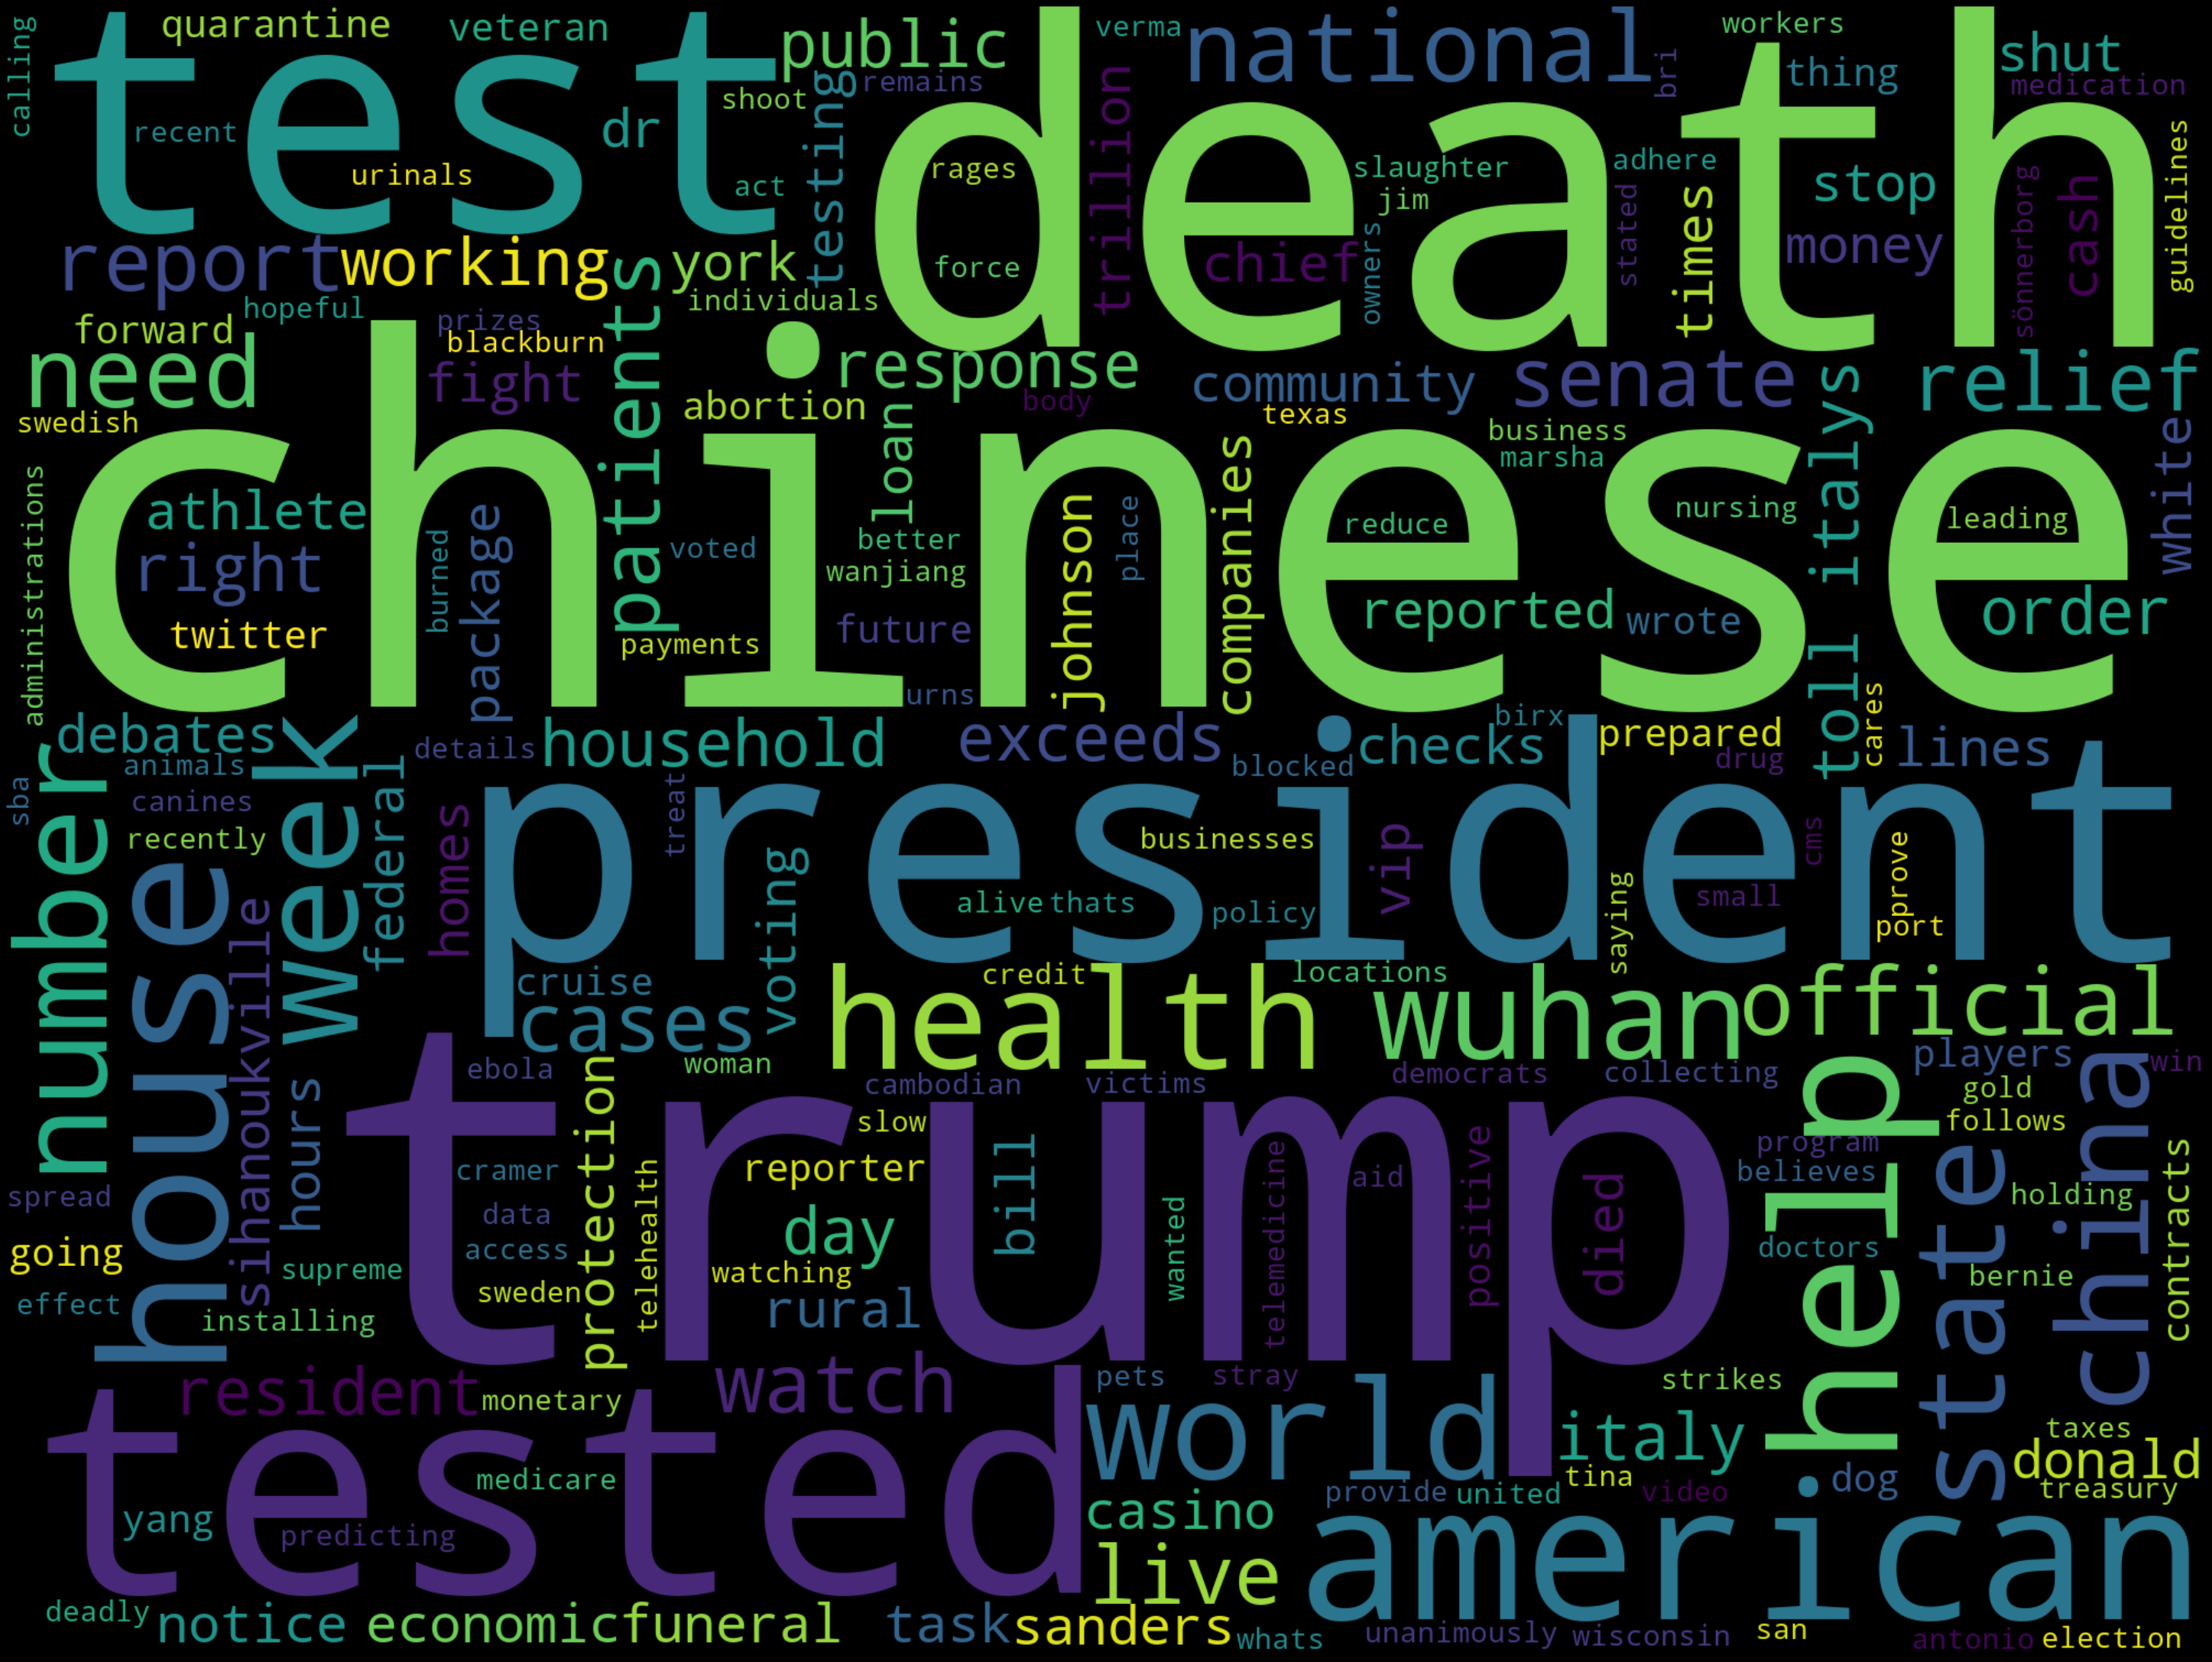

In [39]:
text = " ".join(flat_list)
wordcloud = WordCloud(
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()